In [1]:
import numpy as np
import matplotlib.pyplot as plt
import asa
from asa.dataset import Dataset


In [2]:
x = np.random.normal(size=1000)
y = x**2 + np.random.normal(size=1000)
z = np.log(np.abs(x + y)) + np.random.normal(size=1000)

In [3]:
data = np.array([x, y, z]).T

In [4]:
dataset = Dataset(data, ['x', 'y', 'z'], ['x', 'y', 'z'])

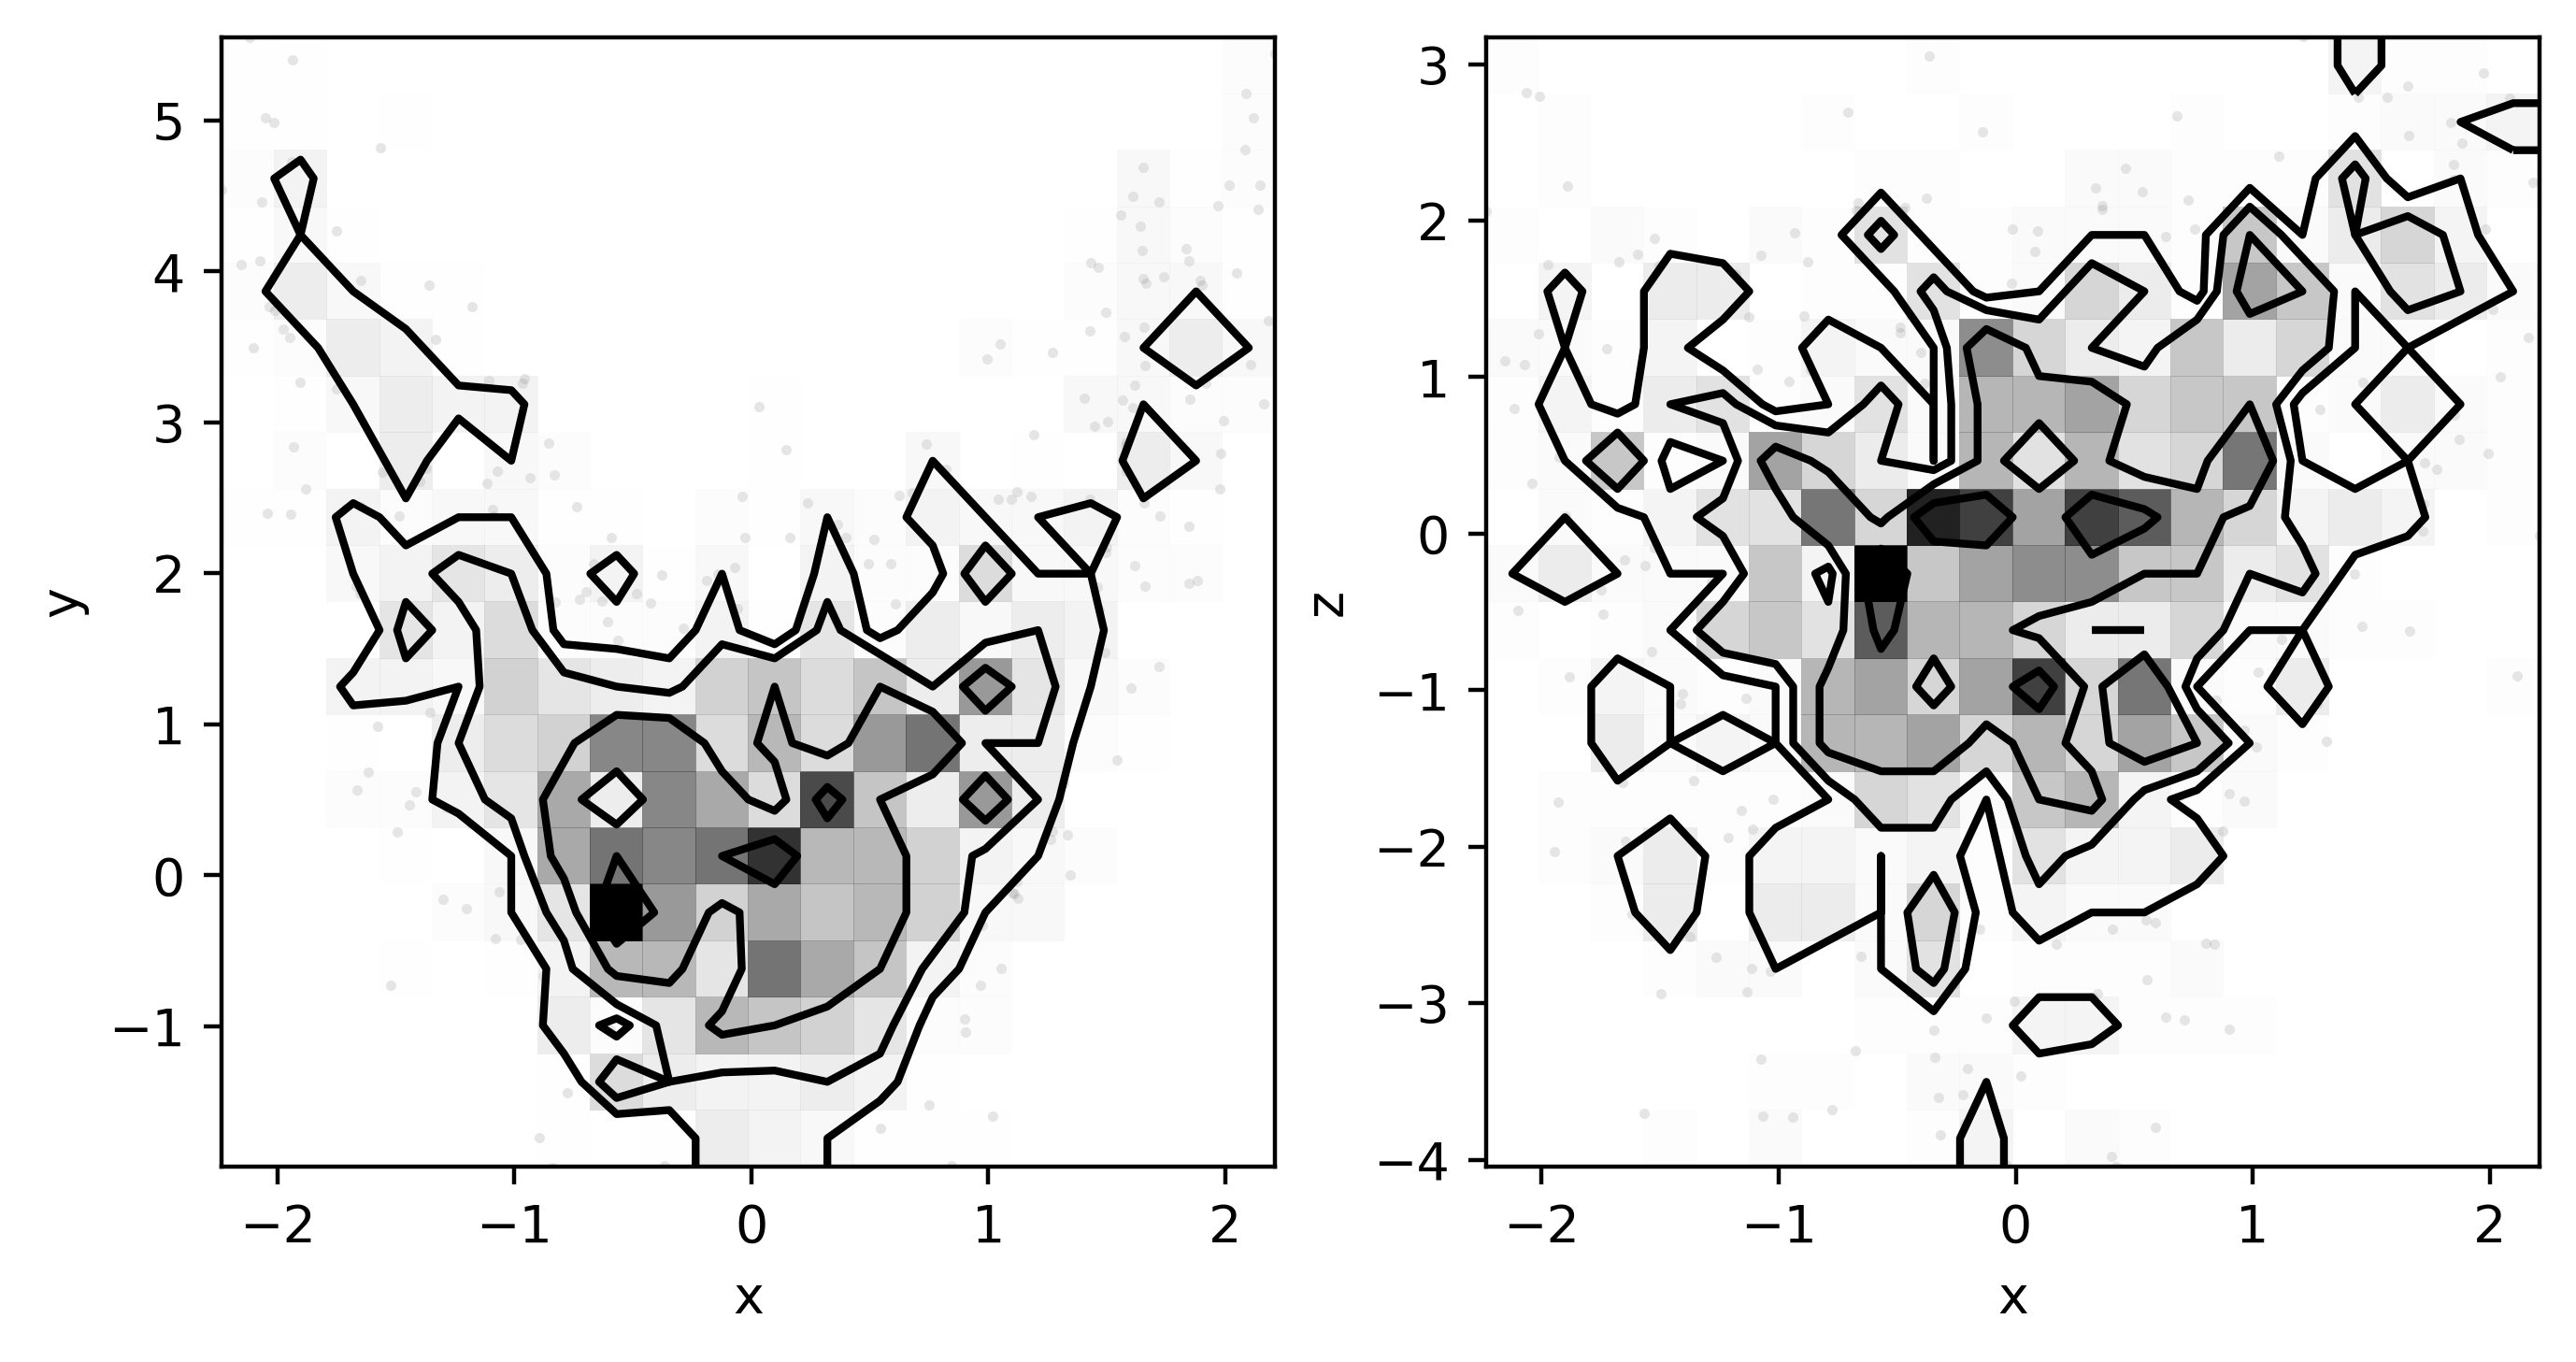

In [5]:
dataset.contour('x', ['y', 'z'], subplots_kwargs={'figshape': (1, 2)})

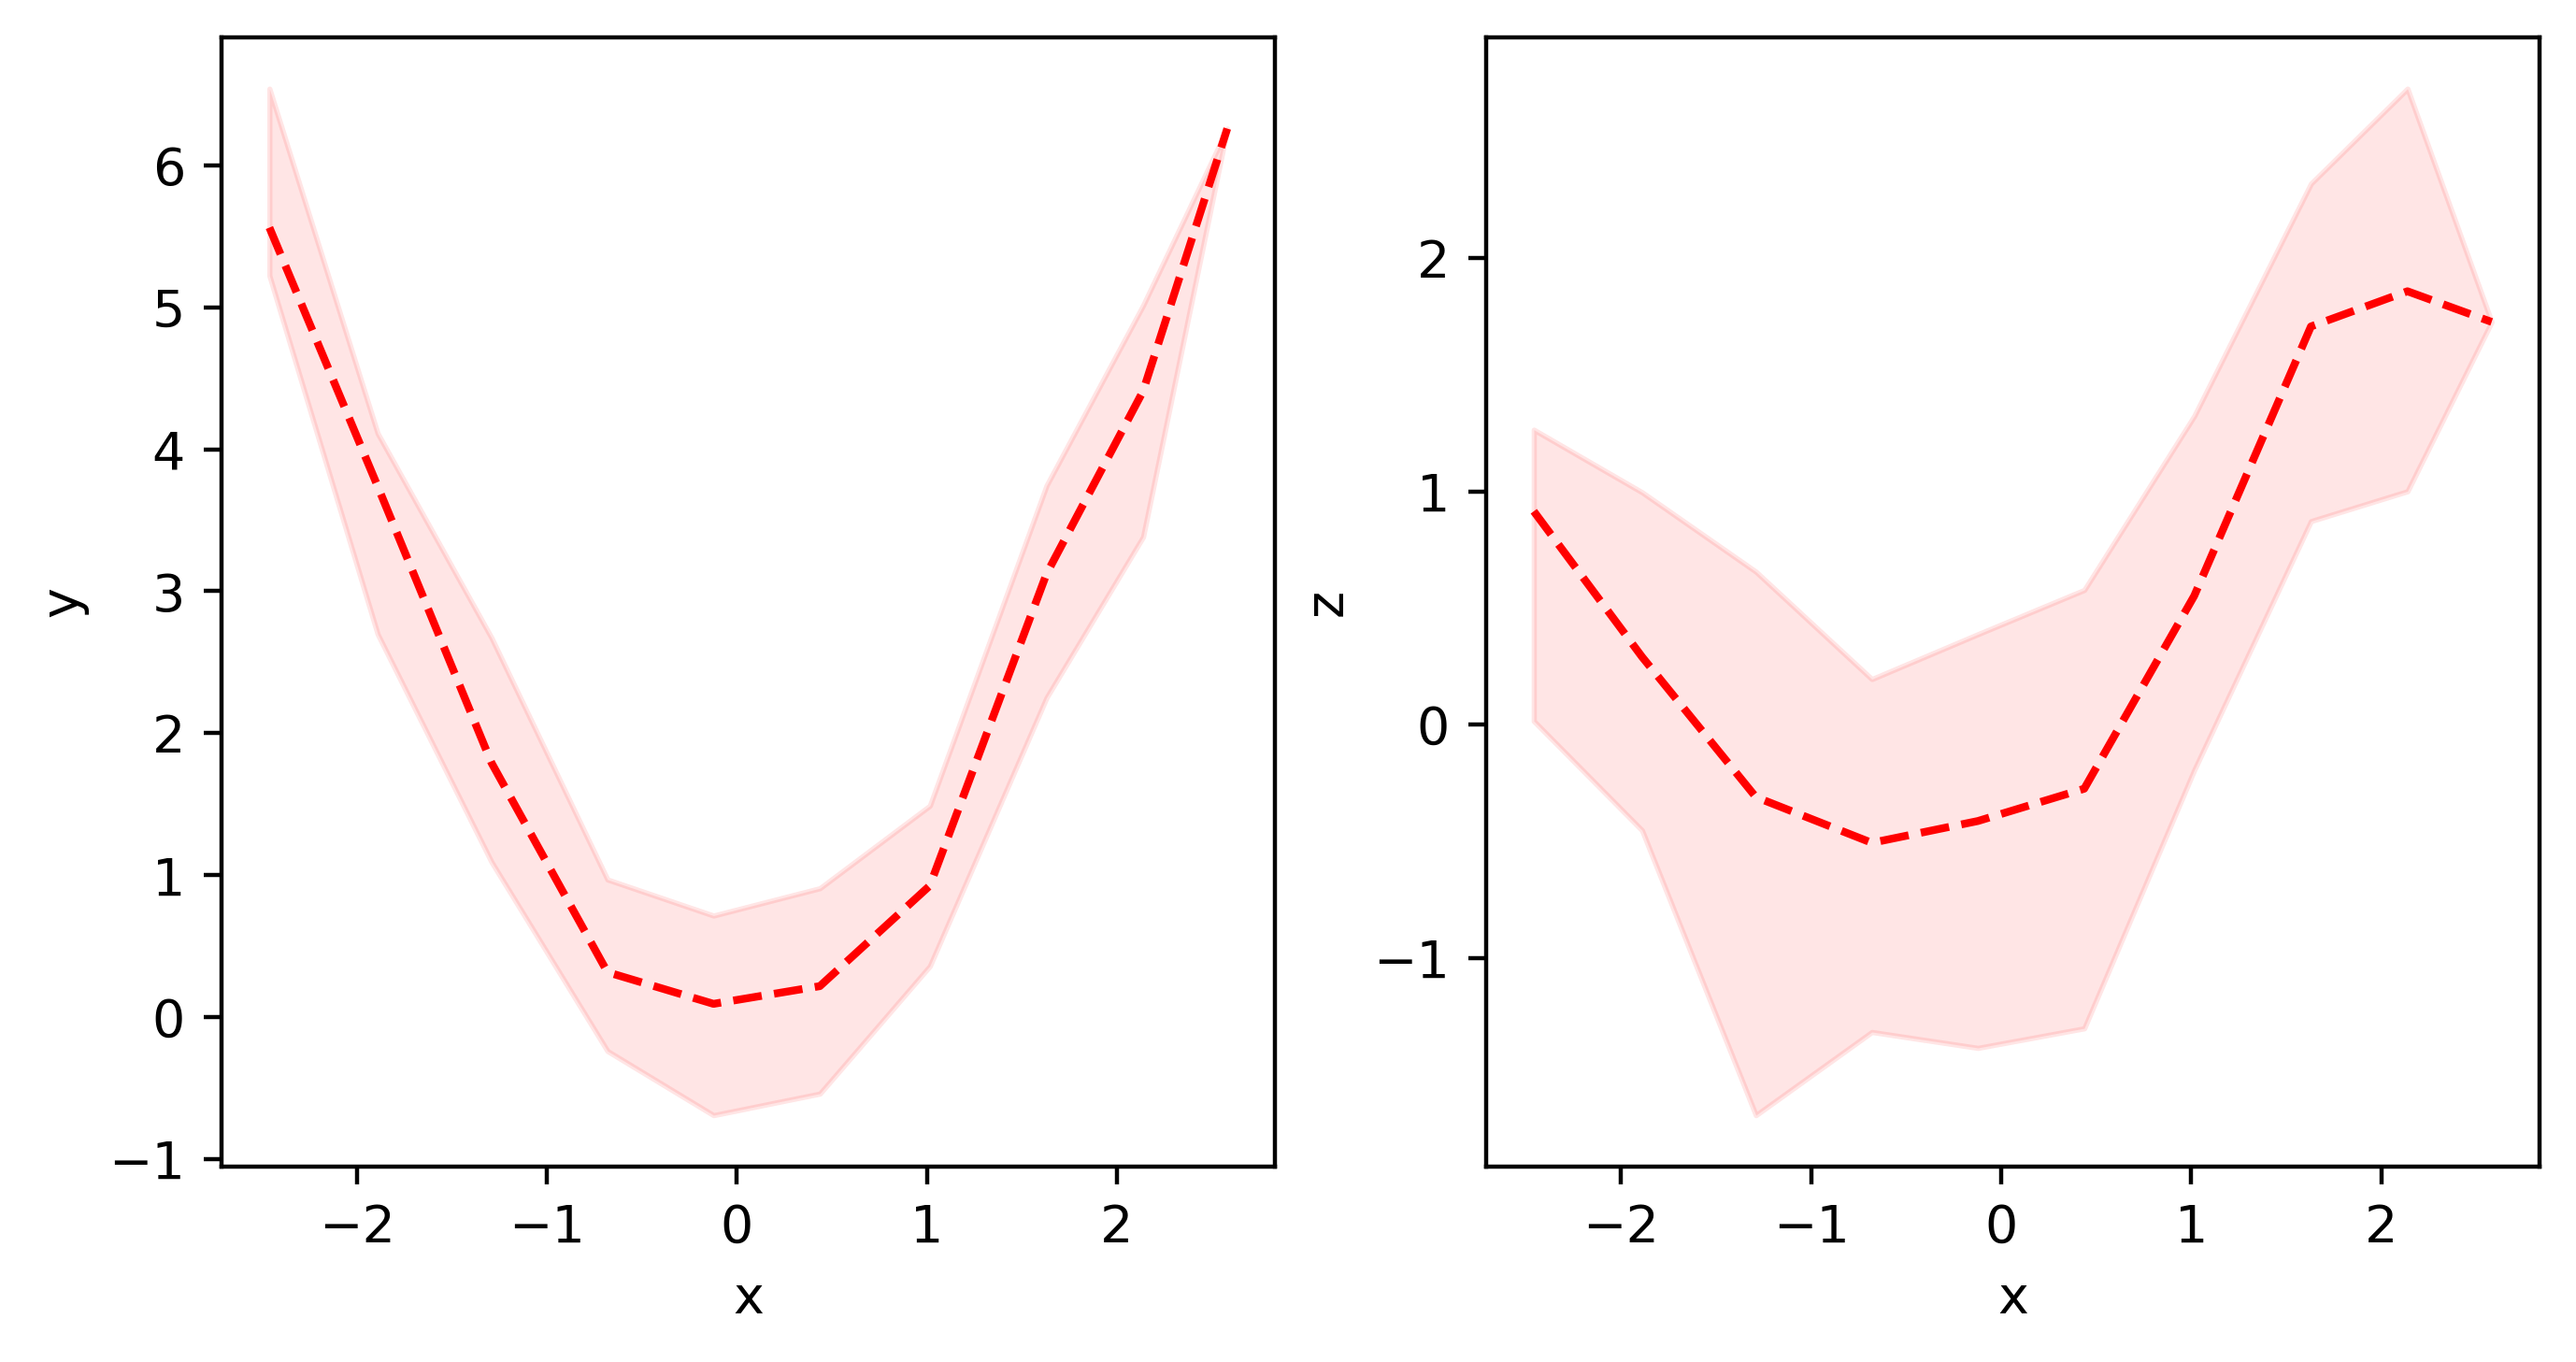

In [11]:
dataset.trend('x', ['y', 'z'], subplots_kwargs={'figshape': (1, 2)},
    bins=10,ytype='median',plot_kwargs={"color":"r","ls":"--","label":"1"},\
    scatter_kwargs={"ifscatter":"True","uplim":75,"bottomlim":25,"fkind":"fbetween",\
    "plot_scatter_kwargs":{"color":"r","alpha":0.1}})